In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/LoanApprovalPrediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [15]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
df.dropna(inplace= True)

In [14]:
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.drop(columns=['Loan_ID'],inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             505 non-null    object 
 1   Married            505 non-null    object 
 2   Dependents         505 non-null    float64
 3   Education          505 non-null    object 
 4   Self_Employed      505 non-null    object 
 5   ApplicantIncome    505 non-null    int64  
 6   CoapplicantIncome  505 non-null    float64
 7   LoanAmount         505 non-null    float64
 8   Loan_Amount_Term   505 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Property_Area      505 non-null    object 
 11  Loan_Status        505 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 51.3+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
for i in df.select_dtypes(include='object'):
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

In [27]:
df.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.348019,0.200325,0.050313,-0.029794,0.045105,0.151049,0.102750,-0.095038,0.013591,-0.004674,0.055776
Married,0.348019,1.000000,0.381341,-0.000852,-0.014871,0.043282,0.107696,0.169471,-0.106595,0.018443,0.034591,0.103718
Dependents,0.200325,0.381341,1.000000,0.021561,0.029033,0.099684,0.001946,0.150881,-0.086525,-0.034602,0.016547,0.035650
Education,0.050313,-0.000852,0.021561,1.000000,0.005621,-0.128610,-0.068371,-0.169609,-0.087662,-0.049749,-0.072276,-0.064263
Self_Employed,-0.029794,-0.014871,0.029033,0.005621,1.000000,0.150973,-0.016390,0.097075,-0.035767,0.011769,-0.068038,0.004382
ApplicantIncome,0.045105,0.043282,0.099684,-0.128610,0.150973,1.000000,-0.115651,0.523904,-0.056474,-0.046667,-0.019629,-0.031608
CoapplicantIncome,0.151049,0.107696,0.001946,-0.068371,-0.016390,-0.115651,1.000000,0.178145,0.002571,-0.007905,0.007164,-0.044173
LoanAmount,0.102750,0.169471,0.150881,-0.169609,0.097075,0.523904,0.178145,1.000000,0.033250,-0.034702,-0.086091,-0.058885
Loan_Amount_Term,-0.095038,-0.106595,-0.086525,-0.087662,-0.035767,-0.056474,0.002571,0.033250,1.000000,0.029234,-0.065762,-0.014107
Credit_History,0.013591,0.018443,-0.034602,-0.049749,0.011769,-0.046667,-0.007905,-0.034702,0.029234,1.000000,-0.007448,0.529445


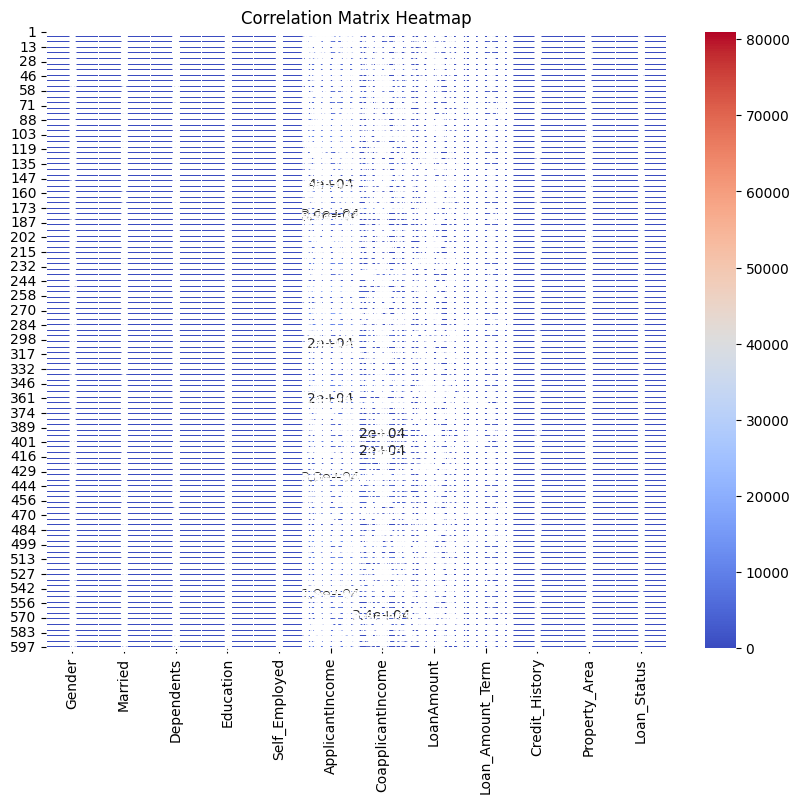

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             505 non-null    int64  
 1   Married            505 non-null    int64  
 2   Dependents         505 non-null    int64  
 3   Education          505 non-null    int64  
 4   Self_Employed      505 non-null    int64  
 5   ApplicantIncome    505 non-null    int64  
 6   CoapplicantIncome  505 non-null    float64
 7   LoanAmount         505 non-null    float64
 8   Loan_Amount_Term   505 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Property_Area      505 non-null    int64  
 11  Loan_Status        505 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 51.3 KB


In [37]:
df["Dependents"] = df["Dependents"].astype(int)

In [39]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype(int)

In [80]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.475109,0.747424,0.224239,-0.506181,-0.468836,-0.135324,-0.021455,-0.203955,0.279639,0.404468,-1.304798,-1.523932
2,0.475109,0.747424,-0.760464,-0.506181,2.132944,-0.393908,-0.609957,-0.967260,0.279639,0.404468,1.269120,0.656197
3,0.475109,0.747424,-0.760464,1.975579,-0.468836,-0.462025,0.310260,-0.302446,0.279639,0.404468,1.269120,0.656197
4,0.475109,-1.337929,-0.760464,-0.506181,-0.468836,0.096144,-0.609957,-0.043907,0.279639,0.404468,1.269120,0.656197
5,0.475109,0.747424,1.208942,-0.506181,2.132944,0.000910,1.027545,1.507328,0.279639,0.404468,1.269120,0.656197


In [45]:
import matplotlib.pyplot as plt


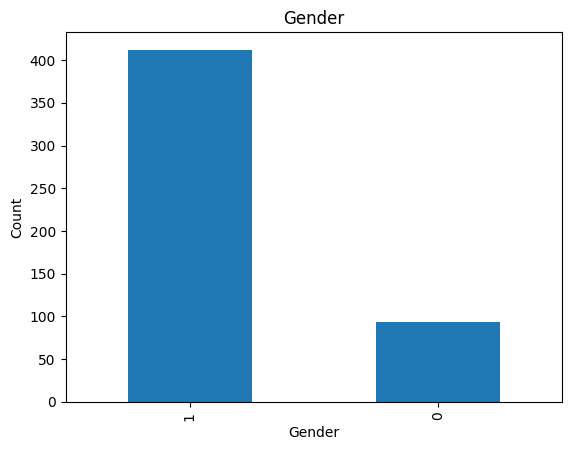

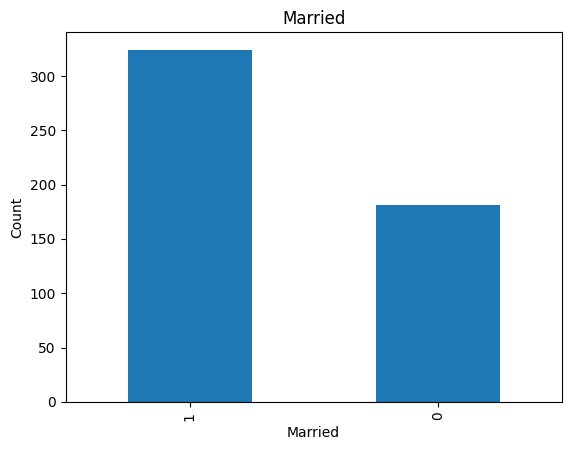

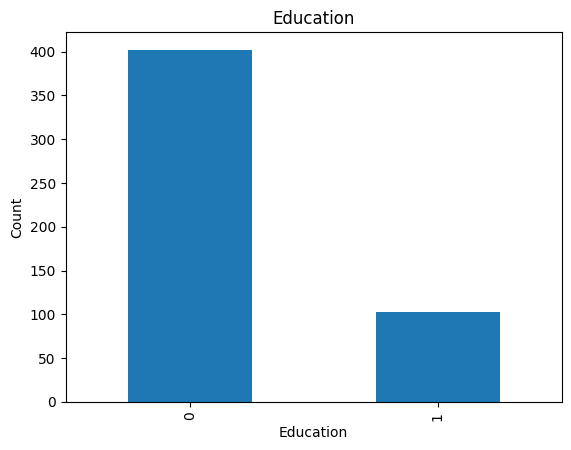

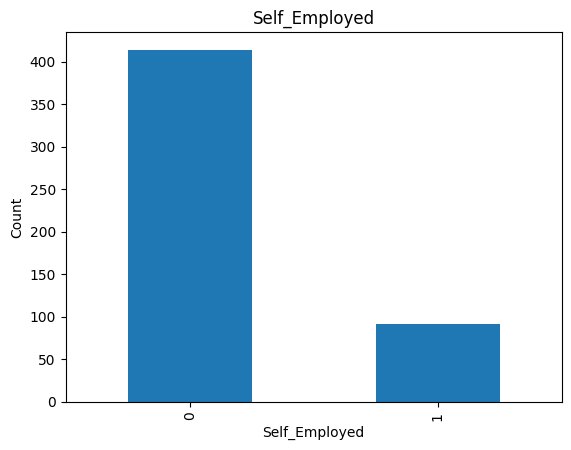

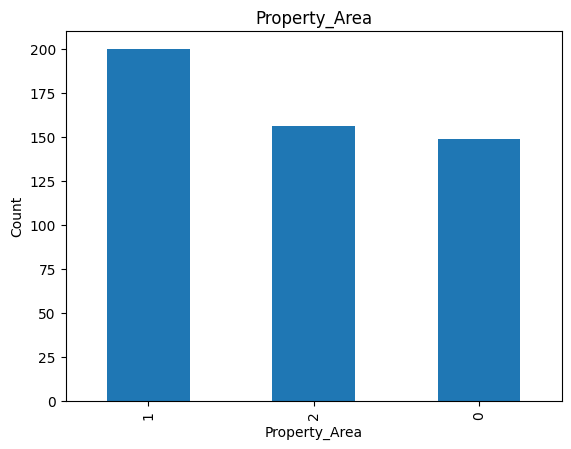

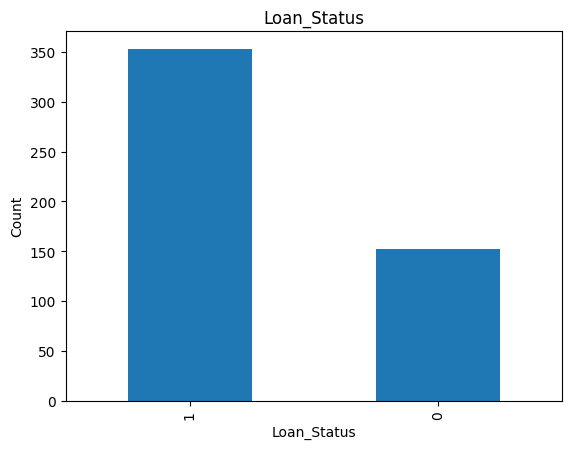

In [54]:
cat_cal =["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

for i in cat_cal:
  df[i].value_counts().plot(kind='bar')
  plt.xlabel(i)
  plt.ylabel("Count")
  plt.title(i)
  plt.show()

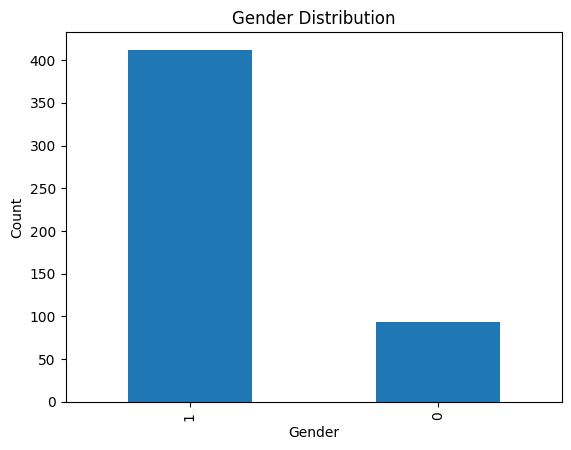

In [53]:
df["Gender"].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

<Axes: >

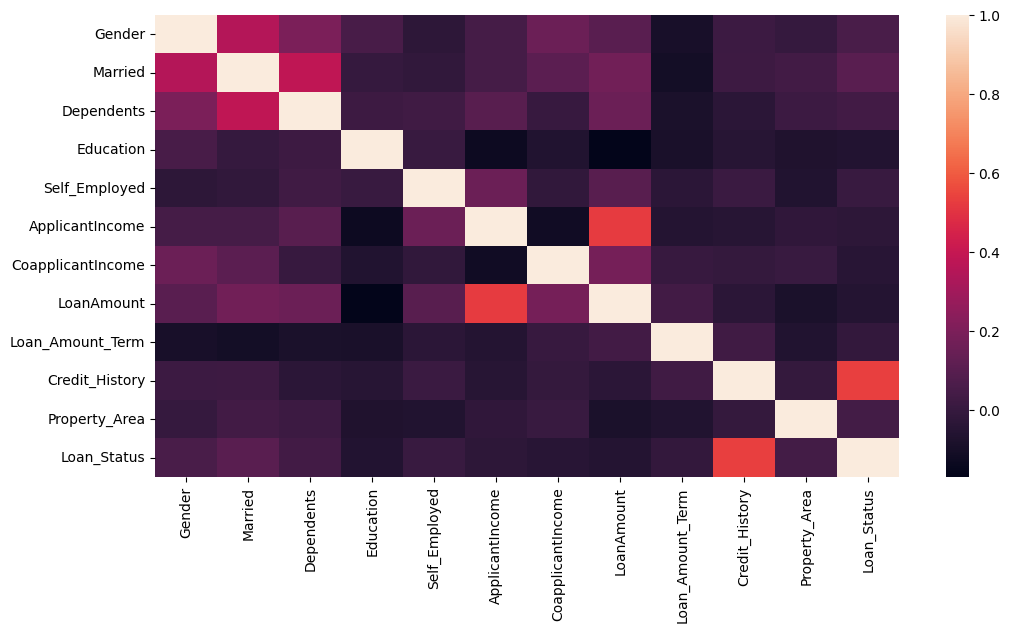

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [62]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())

df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [64]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

((505, 11), (505,))

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((303, 11), (202, 11), (303,), (202,))

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()
for i in df.columns:
  df[i] = sc.fit_transform(df[[i]])

In [ ]:
# model building phase

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.67986798679867
Accuracy score of  KNeighborsClassifier = 79.53795379537954
Accuracy score of  SVC = 73.26732673267327
Accuracy score of  LogisticRegression = 83.16831683168317


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.67986798679867
Accuracy score of  KNeighborsClassifier = 79.53795379537954
Accuracy score of  SVC = 73.26732673267327
Accuracy score of  LogisticRegression = 83.16831683168317


In [ ]:
#Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.